#**Habitantes de Calle 2021**

Los datos para desarrollar esta actividad corresponden al Censo de Habitantes de Calle - CHC- 2021 que se encuentran en el Archivo Nacional de Datos del DANE.

El diccionario de datos se encuentra en:
https://microdatos.dane.gov.co/index.php/catalog/720/data-dictionary

Los microdatos en formato csv se encuentran en:
https://microdatos.dane.gov.co/index.php/catalog/720/get-microdata

Mounted at /content/drive


In [1]:
# 2. Importar la libreria Pandas ;)
import pandas as pd

In [2]:
# 3. Importar un archivo csv, si el delimitador es tabulación usar /t
df=pd.read_csv('CHC_base_anonimizada09-09-2021.csv', delimiter=',', encoding = 'unicode_escape' )

In [3]:
df.shape

(6250, 130)

In [4]:
df.head()

,DIRECTORIO,TIP_FOR,P1,P1S1,P2,P2S1,P5,CTL_1,P8R,P9,...,P35,P36R,P37S1,P37S2,P37S3,P37S4,P37S5,P37S6,P37S7,COMPLETA
0,1.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,44.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,33.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,41.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,29.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
# 1con respecto a la edad y el sexo de los habitantes de calle en 2021 es falso que
# diferencia de edad
# df['P8R'][df['P9']==1].mean()-df['P8R'][df['P9']==2].mean()
# desviación edad hombres
#df['P8R'][df['P9']==1].mean().round(1), df['P8R'][df['P9']==1].std().round(1)
# desviaciones hombres y mujeres
#df['P8R'][df['P9']==1].std().round(1), df['P8R'][df['P9']==2].std().round(1)
# P95 hombres
#df['P8R'][df['P9']==1].quantile(.99 ).round(1)
# P5 mujeres
df['P8R'][df['P9']==2].quantile(.05 ).round(1)


18.0

In [ ]:
# 2. Marihuana
df['sex'] = df['P9'].replace({1: 'hombre', 2: 'mujer'})
df['marihuana'] = df['P30S3'].replace({1: 'Fuma.', 2: 'No fuma'})
#pd.crosstab(df['sex'], df['marihuana'],normalize=False) # sexo vs. marihuan
#pd.crosstab(df['sex'], df['marihuana'],normalize='columns')
#pd.crosstab(df['sex'], df['marihuana'],normalize='index').round(3)*100
df.groupby(['sex','marihuana'])['P8R'].aggregate(['mean']).round(1)
#pd.crosstab(df['sex'], df['marihuana'],normalize=True)*100

mean
sex    marihuana      
hombre Fuma.      37.2
       No fuma    45.7
mujer  Fuma.      33.8
       No fuma    40.1

In [ ]:
# 3 P33S3 abuso policial
df['abuso policial'] = df['P33S3'].replace({1: 'si', 2: 'no'})
#pd.crosstab(df['abuso policial'], df['sex'],normalize=False)
#pd.crosstab(df['abuso policial'], df['sex'], normalize='columns')
pd.crosstab(df['abuso policial'], df['sex'], normalize='index')
#df.groupby(['abuso policial'])['P8R'].aggregate(['mean']).round(1)

sex,hombre,mujer
abuso policial,,
no,0.883838,0.116162
si,0.897338,0.102662


In [ ]:
df['razón'] = df['P22'].replace({1: 'consumo', 2: 'gusto', 3: 'amenaza', 4: 'influencia', 5: 'económicas', 6: 'sin trabajo', 7: 'conflictos', 8: 'abuso', 9: 'siempre he vivido', 10: 'conflito', 11: 'otra'})
#df['razón'].value_counts()
#df['sex'][(df['sex']=='mujer')&(df['razón']=='gusto')].count()
#df['P23S1R'][(df['sex']=='mujer')&(df['P30S8']==1)].count()
# df['P23S1R'][(df['sex']=='hombre')&(df['P17S4']==1)].count()
# df['P17S3'][(df['sex']=='hombre')&(df['P17S3']==1)].count()

In [ ]:
# Usted teme por su vida? (P33_1
df['teme'] = df['P33_1'].replace({1: 'si', 2: 'no'})
#df['teme'].value_counts(normalize=True).round(3)*100
#pd.crosstab(df['teme'], df['sex'], normalize=False)
#df.groupby(['teme','sex'])['P8R'].aggregate(['mean']).round(1)
#pd.crosstab(df['teme'], df['sex'], normalize=False)
pd.crosstab(df['teme'], df['sex'], normalize='index')

sex,hombre,mujer
teme,,
no,0.905109,0.094891
si,0.867641,0.132359


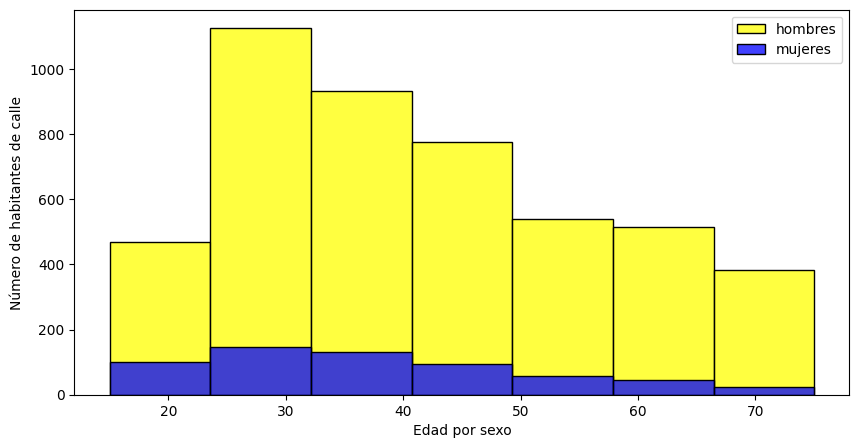

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot( df["P8R"][df['sex']=='hombre'] ,bins=7, color="yellow", label="hombres",kde=False)
sns.histplot( df["P8R"][df['sex']=='mujer'] ,bins=7, color="blue", label="mujeres",kde=False)
ax.set_xlabel("Edad por sexo")
plt.ylabel('Número de habitantes de calle')
plt.legend();

In [ ]:
df['P8R'].describe()

count    5343.000000
mean       41.290474
std        15.289685
min        15.000000
25%        29.000000
50%        39.000000
75%        52.000000
max        75.000000
Name: P8R, dtype: float64

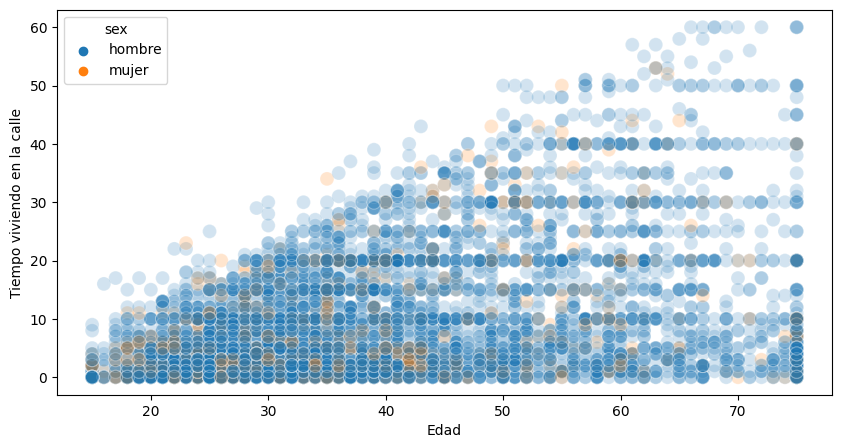

In [ ]:
# 6.
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
plt.ylabel('Tiempo viviendo en la calle')
plt.xlabel('Edad')
ax = sns.scatterplot(x='P8R', y="P23S1R", hue='sex', s=100, alpha=.2, data=df)

In [ ]:
# 7
df['razón'] = df['P22'].replace({1: 'consumo', 2: 'gusto', 3: 'amenaza', 4: 'influencia', 5: 'económicas', 6: 'sin trabajo', 7: 'conflictos', 8: 'abuso', 9: 'siempre he vivido', 10: 'conflito', 11: 'otra'})
#pd.crosstab(df['razón'], df['sex'], normalize=False)
#pd.crosstab(df['razón'], df['sex'], normalize=True).round(3)*100
#pd.crosstab(df['razón'], df['sex'], normalize='columns').round(3)*100
pd.crosstab(df['razón'], df['sex'], normalize='index').round(3)*100

sex,hombre,mujer
razón,,
abuso,33.3,66.7
amenaza,81.7,18.3
conflictos,87.8,12.2
conflito,88.6,11.4
consumo,91.4,8.6
económicas,85.8,14.2
gusto,89.9,10.1
influencia,85.0,15.0
otra,88.8,11.2


In [ ]:
# 8
df['leer'] = df['P27'].replace({1: 'si', 2: 'no'})
#df['P8R'][df['leer']=='no'].describe()
#df['P8R'][df['leer']=='si'].quantile(.05)
#df['P23S1R'][df['leer']=='no'].mean().round(1)
#pd.crosstab(df['leer'], df['sex'], normalize='columns')
df.groupby(['leer','sex'])['P8R'].aggregate(['mean']).round(1)

mean
leer sex         
no   hombre  46.7
     mujer   43.2
si   hombre  40.8
     mujer   36.4

In [ ]:
# 9 P30S1
df['cigarrillo'] = df['P30S1'].replace({1: 'si', 2: 'no'})
#df['cigarrillo'].value_counts(normalize=True)
df.groupby(['cigarrillo'])['P8R'].aggregate(['mean', 'std']).round(1)
#df['P8R'][(df['cigarrillo']=='si')&(df['sex']=='mujer')].quantile(0.5)
#pd.crosstab(df['cigarrillo'], df['sex'], normalize='columns')

,mean,std
cigarrillo,,
no,44.6,16.4
si,38.4,13.5


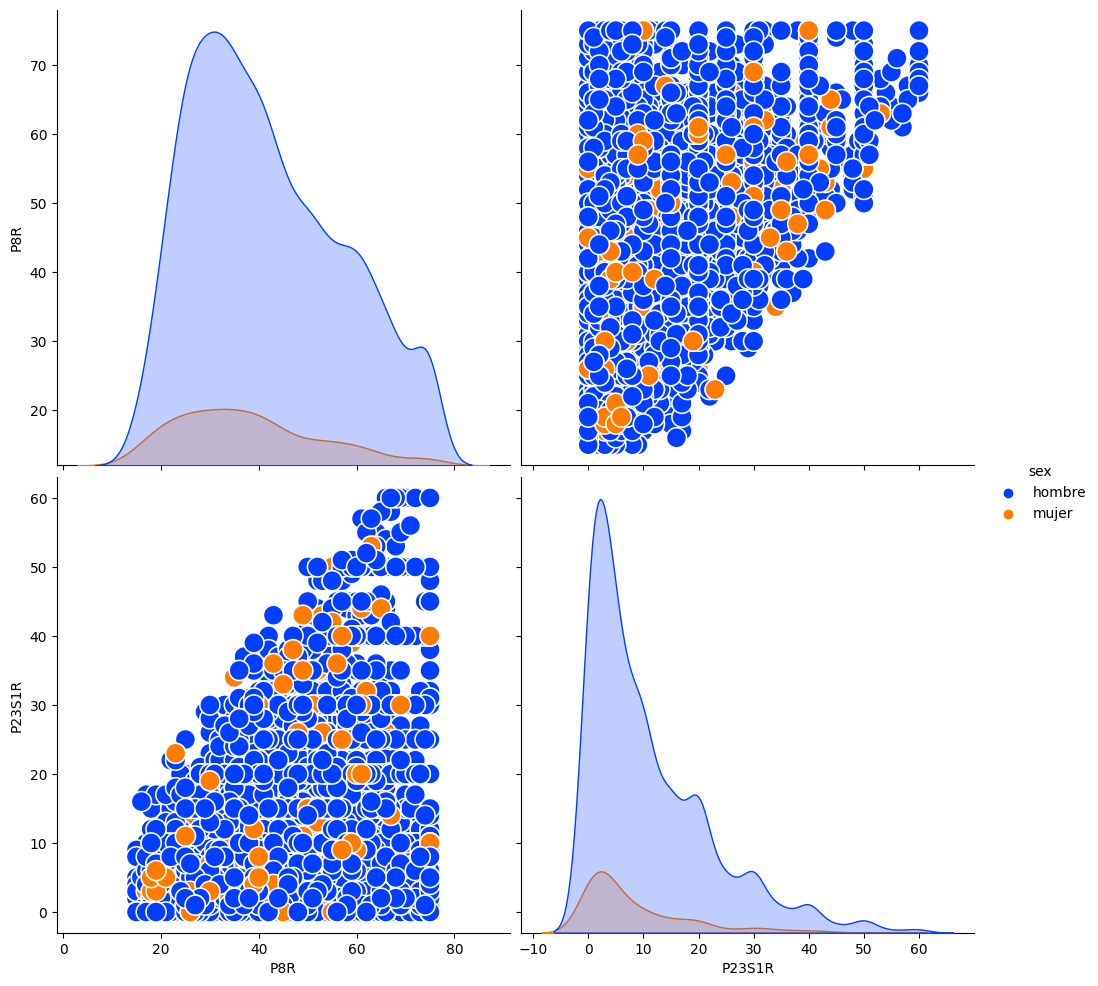

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='sex', x_vars=['P8R','P23S1R'], y_vars=['P8R','P23S1R'], plot_kws={'s':210},height=5, palette='bright');

In [ ]:
df.groupby(['sex'])['P23S1R'].aggregate(['mean']).round(1)

,mean
sex,
hombre,11.1
mujer,8.7


1.	Muestre todos los cálculos e interprete un intervalo de confianza del 90 para la edad promedio de las mujeres que empezaron a vivir en la calle por gusto personal.



In [ ]:
n=len(df['P8R'][(df['sex']=='mujer')&(df['razón']=='gusto')])
n

42

In [ ]:
confianza=0.90
alpha=1-confianza
n=len(df['P8R'][(df['sex']=='mujer')&(df['razón']=='gusto')])
from scipy.stats import norm
z=norm.ppf(1-alpha/2,0,1)
import math
prom=df['P8R'][(df['sex']=='mujer')&(df['razón']=='gusto')].mean()
desv=df['P8R'][(df['sex']=='mujer')&(df['razón']=='gusto')].std()
LI=(prom-z*desv/math.sqrt(n)).round(1)
LS=(prom+z*desv/math.sqrt(n)).round(1)
print("Con una confianza del",confianza*100,"% la media poblacional de la edad de las mujeres que se encuetran en la calle por gusto personal se encuentra entre ",LI, " y ", LS, ' años')
print("promedio", prom)
print("desviación ", desv)
print(n)

Con una confianza del 90.0 % la media poblacional de la edad de las mujeres que se encuetran en la calle por gusto personal se encuentra entre  39.4  y  47.4  años
promedio 43.42857142857143
desviación  15.738941696133374
42


2.	Calcule e interprete el margen de error en la estimación del promedio en años que llevan viviendo en la calle las mujeres que actualmente consumen pepas (use alfa=0.05).


In [ ]:
df['pepas'] = df['P30S8'].replace({1: 'si', 2: 'no'})
confianza=0.95
alpha=1-confianza
n=len(df['P23S1R'][(df['sex']=='mujer')&(df['pepas']=='si')])
from scipy.stats import norm
z=norm.ppf(1-alpha/2,0,1)
import math
prom=df['P23S1R'][(df['sex']=='mujer')&(df['pepas']=='si')].mean()
desv=df['P23S1R'][(df['sex']=='mujer')&(df['pepas']=='si')].std()
LI=(prom-z*desv/math.sqrt(n)).round(2)
LS=(prom+z*desv/math.sqrt(n)).round(2)
error=(z*desv/math.sqrt(n)).round(7)
print("Con una confianza del",confianza*100,"% la media poblacional del tiempo que llevan viviendo en la calle las mujeres que consumen pepas está entre ",LI, " y ", LS, ' años')
print("Con una confianza del ",confianza*100, "% el error de estimación de la media del tiempo que llevan viviendo en la calle las mujeres que consumen pepas es de ",error.round(2), ' años')
print(n, prom,desv)

Con una confianza del 95.0 % la media poblacional del tiempo que llevan viviendo en la calle las mujeres que consumen pepas está entre  7.47  y  12.32  años
Con una confianza del  95.0 % el error de estimación de la media del tiempo que llevan viviendo en la calle las mujeres que consumen pepas es de  2.43  años
38 9.894736842105264 7.629209422696609


In [ ]:
df['P23S1R'][(df['sex']=='mujer')].count() #&(df['pepas']=='si')]

599

3.	Muestre todos los cálculos e interprete un intervalo de confianza del 95% de la proporción de hombres que empezaron a vivir en la calle por amenazas o riesgo para la vida o integridad física.


In [ ]:
n=len(df['sex'][df['sex']=='hombre'])
exitos=df['sex'][(df['sex']=='hombre')&(df['razón']=='amenaza')].count()
pe=exitos/n
exitos,n,pe,n*pe,n*(1-pe)

(49, 4744, 0.01032883642495784, 48.99999999999999, 4695.0)

In [ ]:
confianza=0.95
alpha=1-confianza
from scipy.stats import norm
z=norm.ppf(1-alpha/2,0,1)
import math
LI=(pe-z*math.sqrt((pe*(1-pe))/n)).round(3)*100
LS=(pe+z*math.sqrt((pe*(1-pe))/n)).round(3)*100
print("Con una confianza del",confianza*100,"% la proporción poblacional de hombres que se encuentran en la calle por amenazas está entre entre ",LI.round(2),"%", " y ", LS,"%")
print(pe.round(4)*100)
print(exitos,n)

Con una confianza del 95.0 % la proporción poblacional de hombres que se encuentran en la calle por amenazas está entre entre  0.7 %  y  1.3 %
1.03
49 4744


4.	Calcule e interprete el margen de error de la proporción de hombres con problemas mentales o emocionales (use alfa=0.01).


In [ ]:
df['emocionales'] = df['P17S3'].replace({1: 'si', 2: 'no'})
n=len(df['sex'][df['sex']=='hombre'])
exitos=df['sex'][(df['sex']=='hombre')&(df['emocionales']=='si')].count()
pe=exitos/n
exitos,n,pe,n*pe,n*(1-pe)

(44, 4744, 0.00927487352445194, 44.0, 4700.0)

In [ ]:
confianza=0.99
alpha=1-confianza
from scipy.stats import norm
z=norm.ppf(1-alpha/2,0,1)
import math
LI=(pe-z*math.sqrt((pe*(1-pe))/n)).round(3)*100
LS=(pe+z*math.sqrt((pe*(1-pe))/n)).round(3)*100
error=(z*math.sqrt((pe*(1-pe))/n)).round(4)*100
print("Con una confianza del",confianza*100,"% la proporción poblacional de hombres que se encuentran en la calle por amenazas se encuentra entre ",LI.round(2),"%", " y ", LS.round(1),"%")
print("Con una confianza del ",confianza*100, "% el error de estimación de la proporción de hombres con problemas emocionales es del ",error, '%')
print(n)
print(exitos)

Con una confianza del 99.0 % la proporción poblacional de hombres que se encuentran en la calle por amenazas se encuentra entre  0.6 %  y  1.3 %
Con una confianza del  99.0 % el error de estimación de la proporción de hombres con problemas emocionales es del  0.36 %
4744
44


5.	Muestre todos los cálculo y halle el tamaño de muestra necesario para estimar la edad promedio de los habitantes de calle con una confianza del 99% y con un error máximo de un año

In [ ]:
confianza=0.99
alpha=1-confianza
from scipy.stats import norm
z=norm.ppf(1-alpha/2,0,1)
import math
desv=df['P8R'].std()
error=1
tamano=(z*desv/error)**2
print("Para estimar la media de la edad de los habitantes de calle, con una confianza del",confianza*100,' se debe tomar una muestra de por lo menos', tamano.round(), ' habitantes de calle')



Para estimar la media de la edad de los habitantes de calle, con una confianza del 99.0  se debe tomar una muestra de por lo menos 1551.0  habitantes de calle


##**Prueba de hipótesis**

In [ ]:
df.rename({'P8R': 'Age'}, axis=1, inplace=True)
df['Age'][df['sex']=='mujer'].mean(), df['Age'][df['sex']=='mujer'].std()

(37.8297161936561, 14.446570402957706)

#¿Será que el promedio de la edad de las habitantes de calle mujeres es 35 años?

## Prueba de hipótesis <br>

1.   Hipótesis nula H0 <br>
2.   Hipótesis alternativa Ha <br>
3.   Prueba estadística y su valor p <br>
4.   Región de rechazo <br>
5.   Conclusión


## Las hipótesis en competencia son la **hipótesis alternativa Ha** (hipótesis de investigación) y la **hipótesis nula H0**(una contradicción de la hipótesis alternativa)

## Posibilidades de conclusión: <br>

* Rechazar H0 y concluir que Ha es verdadera
* No rechazar H0



## La decisión de rechazar o no rechazar la hipótesis nula se basa en la información contenida en una muestra aleatoria representativa extraida de la población de interés:

*   **Prueba estadística**: un único número calculado a partir de los datos de la muestra
*   **Valor p**: una probabilidad calculada a partir de la prueba estadística. **El valor p es la probabilidad de observar una prueba estadística tan extrema o más que el valor observado bajo el supuesto de que H0 es verdadera**



## El conjunto de todos los posibles valores de la prueba estadística se divide en dos regiones. La primera corresponde a los valores que apoyan la hipótesis alternativa y ocasionan el rechazo de H0 **región de rechazo**. El otro corresponde a los valores que apoyan la hipótesis nula y se designa como **región de no rechazo**

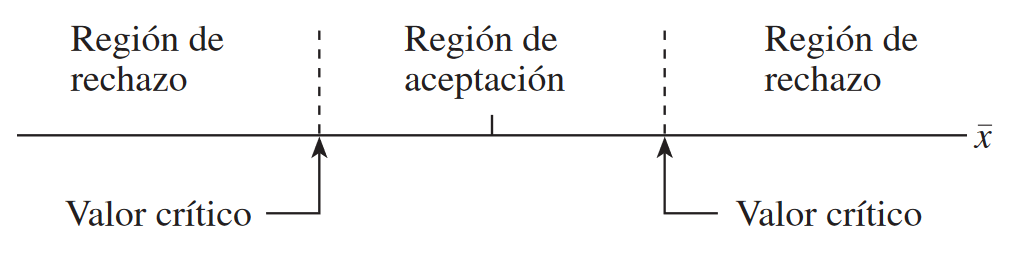

## El **error tipo I** es la probabilidad de rechazar la hipótesis nula cuando esta es verdadera.<br>
## El **nivel de significancia** para una prueba de hipótesis es: <br>
## alpha=P(error tipo I)=P(**rechazar H0 cuando H0 es verdadera**)

In [ ]:
#¿Será que el promedio de la edad de las habitantes de calle mujeres es 35 años?
df.rename({'P8R': 'Age'}, axis=1, inplace=True)
promedio=df['Age'][df['sex']=='mujer'].mean()
desviacion=df['Age'][df['sex']=='mujer'].std()
promedio,desviacion

## 1. Hipótesis nula<br>
##H0: La edad promedio de las habitantes de calle mujeres es de 35 años

## 2. Hipótesis alternativa<br>
##Ha: La edad promedio de las habitantes de calle mujeres no es de 35 años

# 3. Prueba estadística

In [ ]:
n=df['Age'][df['sex']=='mujer'].count()
miu=35
prueba= (promedio-miu)/(desviacion/math.sqrt(n))
prueba,n

# 4. Región de rechazo & p-value

In [ ]:
# Región de rechazo
confianza=0.95
alpha=1-confianza
from scipy.stats import norm
z=norm.ppf(1-alpha/2,0,1)
import math
print('Región de rechazo:')
print('valores z que sean más pequeños que ', -z, ' o valores z que sean más grandes que ',z)

# Valor p

In [ ]:
# Valor p
from scipy.stats import norm
p_value=norm.cdf(-abs(prueba),0,1)+ norm.sf(abs(prueba), 0, 1) # suma de probabilidades de cola a izquierda y derecha respectivamente
print("{:.10f}".format(p_value))

# 5. Conclusion

In [ ]:
print('Primera forma de conclusión:')
print('Como el valor de la prueba estadística es ', prueba)
print('y los valores críticos son:', -z, ' y ', z)
print('por lo tanto se rechaza H0, es decir, la edad promedio de las habitantes de calle no puede ser 35 años')

In [ ]:
print('Segunda forma de conclusión:')
print('Como el valor p es ',"{:.10f}".format(p_value))
print('y este valor es inferior a ', "{:.2f}".format(alpha))
print('Por lo tanto, se rechaza H0,  es decir, la edad promedio de las habitantes de calle no puede ser 35 años')

## ¿La mitad de los habitantes de calle están allí principalmente por el consumo de drogas?



In [ ]:
df['razón'].value_counts(normalize=True)

### 1. Hipotesis nula: El 50% de los habitantes de calle están allí principalemente por el consumo de drogas


### 2. Hipotesis alternativa: El 50% de los habitantes de calle no están allí principalmente por el consumo de drogas

In [ ]:
df.razón.value_counts(normalize=True)

In [ ]:
# Estadístico de prueba
x= df['razón'][df['razón']=='consumo'].count()
n=df['razón'].count()
pe=x/n
p0=0.5
z=(pe-p0)/math.sqrt(p0*(1-p0)/n)
print(pe,x,n,n*pe,(n*(1-pe)),"El estadístico de prueba es:",z)




In [ ]:
# Valor p
from scipy.stats import norm
p_value=norm.cdf(-abs(z),0,1)+ norm.sf(abs(z), 0, 1) # suma de probabilidades de cola a izquierda y derecha respectivamente
print("{:.10f}".format(p_value))

#**IC y pruebas de hipótesis para la diferencia de medias**

##**¿Hay diferencia significativa entre la edad promedio de los hombres y mujeres que están en la calle por el consumo de sustancias psicoactivas**

In [ ]:
df[df['razón']=='consumo'].groupby(['sex'])['Age'].aggregate(['mean','std','count']).round(1)

,mean,std,count
sex,,,
hombre,38.4,12.7,1636
mujer,34.4,11.1,153


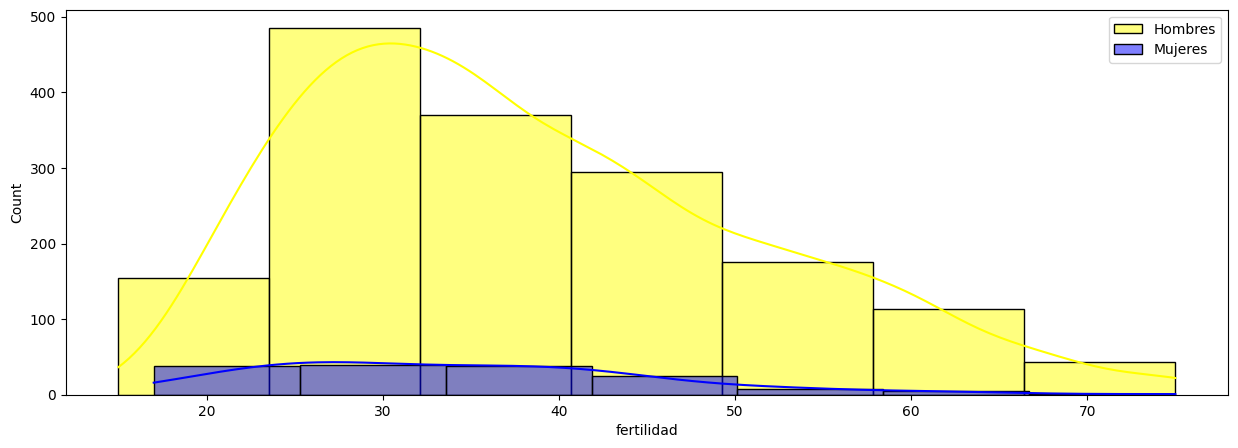

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot( df['Age'][(df['razón']=='consumo')&(df['sex']=='hombre')] ,bins=7, color="yellow", label="Hombres",kde=True)
sns.histplot( df['Age'][(df['razón']=='consumo')&(df['sex']=='mujer')] ,bins=7, color="blue", label="Mujeres",kde=True)
ax.set_xlabel("fertilidad")
plt.legend();

In [ ]:
df.pivot_table(index='razón',columns='sex',values='Age',aggfunc='mean').round(1)

## **IC para la diferencia de medias**

In [ ]:
promedio1=df['Age'][(df['sex']=='hombre')&(df['razón']=='consumo')].mean()
desviacion1=df['Age'][(df['sex']=='hombre')&(df['razón']=='consumo')].std()
n1=df['Age'][(df['sex']=='hombre')&(df['razón']=='consumo')].count()
promedio2=df['Age'][(df['sex']=='mujer')&(df['razón']=='consumo')].mean()
desviacion2=df['Age'][(df['sex']=='mujer')&(df['razón']=='consumo')].std()
n2=df['Age'][(df['sex']=='mujer')&(df['razón']=='consumo')].count()
print('hombres: ', promedio1, desviacion1,n1)
print('mujeres: ', promedio2, desviacion2,n2)

In [ ]:
confianza=0.95
alpha=1-confianza
from scipy.stats import norm
z=norm.ppf(1-alpha/2,0,1)
import math
z

In [ ]:
LI=(promedio1-promedio2)-z*math.sqrt(desviacion1**2/n1+desviacion2**2/n2)
LS=(promedio1-promedio2)+z*math.sqrt(desviacion1**2/n1+desviacion2**2/n2)
print(LI.round(1),LS.round(1))

Conclusión por medio del IC: como el IC del 95% no contiene al cero, asumimos que existe diferencia significativa entre la edad promedio de hombres y mujeres cuya principal razón para estar en la calle es el consumo de sustancias psicoactivas.

## Prueba de hipótesis

### 1. Hipótesis nula<br>
###H0: La edad promedio de los habitantes de calle hombres y mujeres que están en la calle por el consumo de sustancias psicoactivas es la misma.

### 2. Hipótesis alternativa<br>
### Ha: La edad promedio de las habitantes de calle hombres y mujeres que están en la calle por el consumo de sustancias psicoactivas no es la misma

### 3. Prueba estadística

In [ ]:
sp2=((n1-1)*desviacion1**2+(n2-1)*desviacion2**2)/(n1+n2-2)
tc=(promedio1-promedio2)/math.sqrt(sp2*(1/n1+1/n2))
print(tc)

### 3. Región de rechazo

In [ ]:
confianza=0.95
alpha=1-confianza
from scipy.stats import t
tcritico=t.ppf(1-alpha/2,n1+n2-2)
import math
print('Región de rechazo:')
print('valores t que sean más pequeños que ', -tcritico, ' o valores t que sean más grandes que ',tcritico)

### Valor p

In [ ]:
from scipy.stats import t
p_value=t.cdf(-abs(tc),df=n1+n2-2) +t.sf(abs(tc)  ,df=n1+n2-2)# suma de probabilidades de cola a izquierda y derecha respectivamente
print("{:.10f}".format(p_value))

### Conclusión

In [ ]:
print('Primera forma de conclusión:')
print('Como el valor de la prueba estadística es ', tc.round(5))
print('y los valores críticos son:', -tcritico, ' y ', tcritico)
print('con una confianza del ', confianza*100, '% no se rechaza H0, es decir, la edad promedio de las habitantes de calle hombres y mujeres que estan en la calle')
print('por consumo de sustancias no es significativamente diferente')

In [ ]:
print('Segunda forma de conclusión:')
print('Como el valor p es ',"{:.10f}".format(p_value))
print('y este valor es superior a ', "{:.2f}".format(alpha))
print('no se rechaza H0,  es decir, la edad promedio de las habitantes de calle hombres y mujeres que estan en la calle')
print('por consumo de sustancias no es significativamente diferente')

In [ ]:
df['sex'] = df['P9'].replace({1: 'hombre', 2: 'mujer'})
df['marihuana'] = df['P30S3'].replace({1: 'Fuma.', 2: 'No fuma'})

In [ ]:
# Ayuda
# Tabular una variable cualitativa X:
# df['X’].value_counts(normalize=False)

# Seleccionar solo las variables X, Y:
# df[['X', 'Y']]

# Filtrar cuando la variable X es x:
# df[df['X']=='x']

# Filtrar cuando la variable X=x & Y=y
# df[(df['X']=='x') & (df['Y']='y') ]

# Filtrar por texto be variable:
# df[df['X'].str.contains('xxx’)]

# Ordenar por la variable X:
# df.sort_values(by=['X'],ascending=True)

# Bloquear por una o más condiones:
# df.loc[(df['X'] == 'x') & (df['Y'] == 'y')]

# Redondear decimales:
# round(X,1)

# Group by
# df.groupby(['X','Y'])['Z'].aggregate(['count','mean','std’])

# Crosstabulation
# pd.crosstab(df['X'], df['Y'],normalize=False)

# Pivot table
# df.pivot_table(index='X',columns='Y',values='Z',aggfunc='mean')

In [ ]:
df['razón'] = df['P22'].replace({1: 'consumo', 2: 'gusto', 3: 'amenaza', 4: 'influencia', 5: 'económicas', 6: 'sin trabajo', 7: 'conflictos', 8: 'abuso', 9: 'siempre he vivido', 10: 'conflito', 11: 'otra'})
